<a href="https://colab.research.google.com/github/banteamlak1888/ML_project_2025/blob/main/Task2_Class_Balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font size=25, face='Times New Roman'>Random Over Sampling</font>**

In [8]:
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
df=pd.read_csv('T2_Filled_data_water_potability.csv')
df.shape

(3276, 10)

In [10]:
X=df[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y=df['Potability']

#

<font size="8" face="Times New Roman" color="red"><b>Before Sampling</b></font>


In [23]:
df.value_counts('Potability')

,count
Potability,
0,1998
1,1278


Text(0.5, 1.0, 'Original Data')

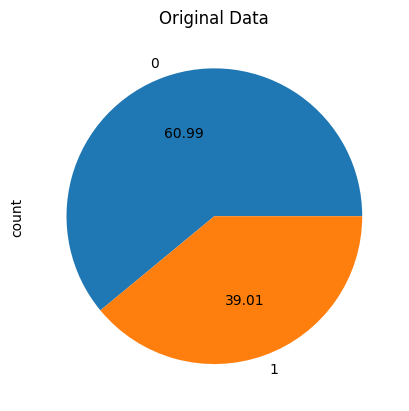

In [11]:
resampled=Y.value_counts().plot.pie(autopct='%.2f')
resampled.set_title('Original Data')

#

<font size="8" face="Times New Roman" color="red"><b>After Sampling</b></font>


In [12]:

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority',random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X,Y)

In [19]:
balanced_df=Y_resampled.value_counts()
balanced_df

,count
Potability,
0,1998
1,1998


Text(0.5, 1.0, 'Over Sampling')

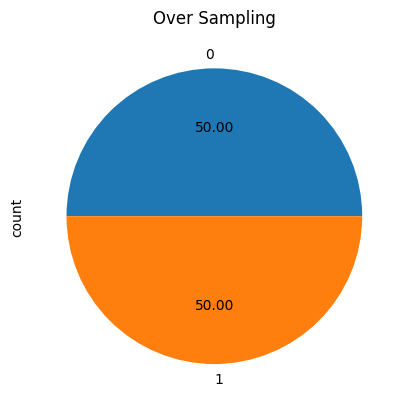

In [20]:
balanced_df=Y_resampled.value_counts().plot.pie(autopct='%.2f')
balanced_df.set_title('Over Sampling')

#

In [22]:
Y_resampled.value_counts().to_csv('T3_Balanced_Dataset_water_potability.csv', index=False)

#

# <font size=25, face='Times New Roman'>Import Packeges</font>

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', RuntimeWarning)
#warnings.simplefilter('ignore', ConvergenceWarning)


import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
df2=pd.read_csv('Balanced_Dataset.csv')

In [ ]:
df2.value_counts()

Unnamed: 0  Potability
0           1998          1
1           1998          1
dtype: int64

#

# <font size=25, face='Times New Roman'>Load Libraries</font>

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier

#

<font size=25, face='Times New Roman'>Machine Learning Models</font>

In [ ]:
models = []
models.append(('SVM', SVC(C=10, gamma=0.01, kernel='rbf')))
models.append(("RF",RandomForestClassifier(max_features= 3, min_samples_leaf=4, min_samples_split=12, n_estimators= 300)))
models.append(("NN",MLPClassifier(hidden_layer_sizes=(100,),activation= 'tanh', alpha= 0.05, learning_rate='adaptive', solver='sgd')))
models.append(('LR',LogisticRegression(C=10,random_state = 0)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=15,min_samples_split= 2)))

#

<font size=25, face='Times New Roman'>Training and Testing</font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=1)

#

<font size=20, face='Times New Roman'>Training</font>

In [ ]:
for name, model in models:
    model.fit(X_train, y_train)

    confusion=confusion_matrix(y_train, model.predict(X_train))

    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # Sensitivity(recall), precision, or true positive rate
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    ACC = (TP+TN)/(TP+FP+FN+TN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    print(name,'--------------------------------------------')
    print('ACC:',ACC.round(2))
    print('TPR:',TPR.round(2))
    print('TNR:',TNR.round(2))
    print('F1_Score:',F1_Score.round(2))

SVM --------------------------------------------
ACC: 1.0
TPR: 1.0
TNR: 1.0
F1_Score: 1.0
RF --------------------------------------------
ACC: 0.95
TPR: 0.88
TNR: 1.0
F1_Score: 0.93
NN --------------------------------------------
ACC: 0.62
TPR: 0.0
TNR: 1.0
F1_Score: nan
LR --------------------------------------------
ACC: 0.62
TPR: 0.0
TNR: 1.0
F1_Score: 0.0


ValueError: max_features must be in (0, n_features]

#

<font size=20, face='Times New Roman'>Testing</font>

In [ ]:
for name, model in models:
    model.fit(X_train, y_train)

    confusion=confusion_matrix(y_test, model.predict(X_test))

    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    #Sensitivity(recall), precision, or true positive rate
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    ACC = (TP+TN)/(TP+FP+FN+TN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    print(name,'--------------------------------------------')
    print('ACC:',ACC.round(2))
    print('TPR:',TPR.round(2))
    print('TNR:',TNR.round(2))
    print('F1_Score:',F1_Score.round(2))

SVM --------------------------------------------
ACC: 0.57
TPR: 0.0
TNR: 1.0
F1_Score: nan
RF --------------------------------------------
ACC: 0.65
TPR: 0.28
TNR: 0.93
F1_Score: 0.41
NN --------------------------------------------
ACC: 0.57
TPR: 0.0
TNR: 1.0
F1_Score: 0.01
LR --------------------------------------------
ACC: 0.57
TPR: 0.0
TNR: 1.0
F1_Score: nan


ValueError: max_features must be in (0, n_features]